In [1]:
import find_source
from find_source import summary, significant
import glob
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np

In [2]:
for file in glob.glob('../data/multi_track/*.fits'):
    try:
        summ = summary(file, True, False, False)
        if (summ['int_prob'] < 0.01) != (summ['calc_int_prob'] < 0.01):
            print(file, summ['int_prob'], summ['calc_int_prob'])
    except:
        pass

../data/multi_track/hd28867b_11137.fits 0.0056250262526053125 0.031348325366970686
../data/multi_track/v583aur_11128.fits 0.001435480164970328 0.01737149093445791
../data/multi_track/l1551-51_11142.fits 0.008202521365203103 0.10370269070266798
../data/multi_track/vv1348tau_11135.fits 0.00071829978587562 0.010639404240030445
../data/multi_track/hd31305_10943.fits 0.007842197484075058 0.30549413125615643
../data/multi_track/v1115tau_11159.fits 0.006044011973401245 0.1258044075829773
../data/multi_track/2mass j0424_11010.fits 0.0024523717544691387 0.02893897837323484


/Users/chloexu/conda/anaconda3/envs/casaenv/lib/python3.10/site-packages/astropy/units/quantity.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(self.to_value(dimensionless_unscaled))


../data/multi_track/hd285281_11025.fits 0.002456193283855703 0.013686176734079502
../data/multi_track/hd28867_11025.fits 0.00010653369331715884 0.025817642824567937
../data/multi_track/hd284135_11078.fits 0.005899382408963414 0.03646420505616313
../data/multi_track/hd284149_11025.fits 0.005539792112810612 0.08593262029692374
../data/multi_track/v1195tau_11076.fits 0.00033786365419613833 0.029803578791912533


In [ ]:
#summary('../data/11151/l1551-51.fits', False, False, True, '../paper_figs')

In [ ]:
#summary('../data/1407+2827.fits', False, False, True, '../paper_figs')

In [ ]:
#summary('../data/11151/3c279.fits', False, False, True, '../paper_figs')

In [ ]:
#files = []
#for file in glob.glob('../data/*.fits'):
#    files.append(file)
#files.sort()
#results = []
#for file in files:
#    try:
#        results.append(significant(file, 0.095))
#    except Exception:
#        pass
#for res in results:
#    print(res)

In [ ]:
thresholds = [0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1]
false_positives = [0,0,1,1,1,2,3,3,3,4,4,4,4,6,6,6,6,6,6,7]
expected_false_positives = [ele * 97 for ele in thresholds]

False Positives:
y=74.4x-0.258, R^2=0.954
False Positives:
y=97.00x+0.00, R^2=1.0


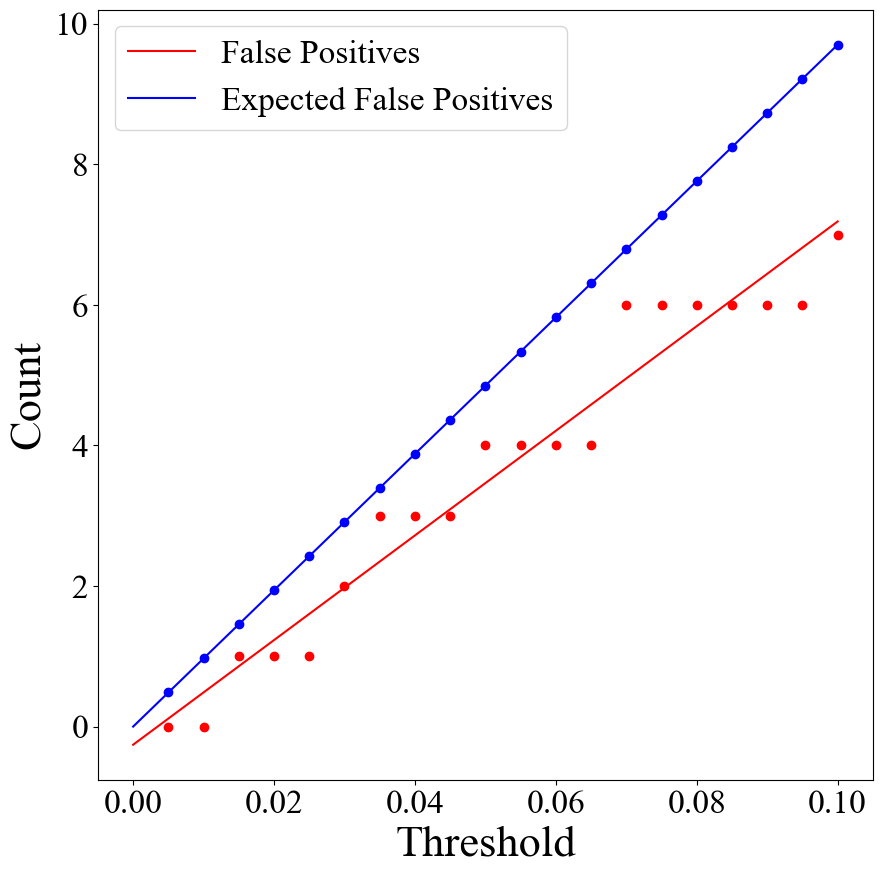

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 24

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(thresholds, false_positives, color='r')
fp_slope, fp_intercept, fp_r_value, fp_p_value, fp_std_err = stats.linregress(thresholds, false_positives)
x= np.linspace(0,0.10,100)
fp_y = fp_slope * x + fp_intercept
plt.plot(x, fp_y, color='r', label='False Positives')

plt.scatter(thresholds, expected_false_positives, color='b')
efp_slope, efp_intercept, efp_r_value, efp_p_value, efp_std_err = stats.linregress(thresholds, expected_false_positives)
efp_y = efp_slope * x + efp_intercept
plt.plot(x, efp_y, color='b', label='Expected False Positives')

plt.legend()
plt.xlabel('Threshold', fontsize=32)
plt.ylabel('Count', fontsize=32)
plt.savefig('../paper_figs/threshold_test.pdf')

print(f'False Positives:\ny={fp_slope:.1f}x{fp_intercept:.3f}, R^2={fp_r_value**2:.3f}')
print(f'False Positives:\ny={efp_slope:.2f}x+{efp_intercept:.2f}, R^2={efp_r_value**2}')